### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from IPython.display import Image
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

### Read the data

In [2]:
df = pd.read_csv('./data/train.csv.gz') 

In [3]:
print(df.shape)

(26729, 10)


### Start looking into the data

In [4]:
df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AnimalID        26729 non-null  object
 1   Name            19038 non-null  object
 2   DateTime        26729 non-null  object
 3   OutcomeType     26729 non-null  object
 4   OutcomeSubtype  13117 non-null  object
 5   AnimalType      26729 non-null  object
 6   SexuponOutcome  26728 non-null  object
 7   AgeuponOutcome  26711 non-null  object
 8   Breed           26729 non-null  object
 9   Color           26729 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


In [6]:
df.nunique()

AnimalID          26729
Name               6374
DateTime          22918
OutcomeType           5
OutcomeSubtype       16
AnimalType            2
SexuponOutcome        5
AgeuponOutcome       44
Breed              1380
Color               366
dtype: int64

In [7]:
df.isna().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

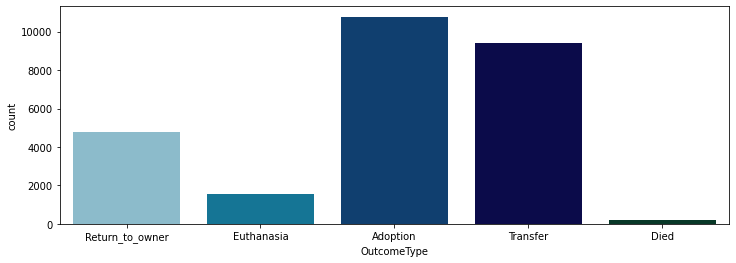

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(x='OutcomeType', data=df, palette='ocean_r')

In [9]:
df.groupby(['OutcomeType','OutcomeSubtype']).size()


OutcomeType  OutcomeSubtype     
Adoption     Barn                      1
             Foster                 1800
             Offsite                 165
Died         At Vet                    4
             Enroute                   8
             In Foster                52
             In Kennel               114
             In Surgery                3
Euthanasia   Aggressive              320
             Behavior                 86
             Court/Investigation       6
             Medical                  66
             Rabies Risk              74
             Suffering              1002
Transfer     Barn                      1
             Partner                7816
             SCRP                   1599
dtype: int64

<AxesSubplot:xlabel='AnimalType', ylabel='count'>

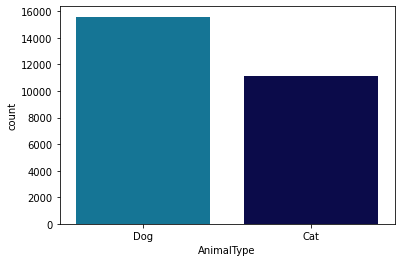

In [10]:
sns.countplot(x='AnimalType', data=df, palette='ocean_r')

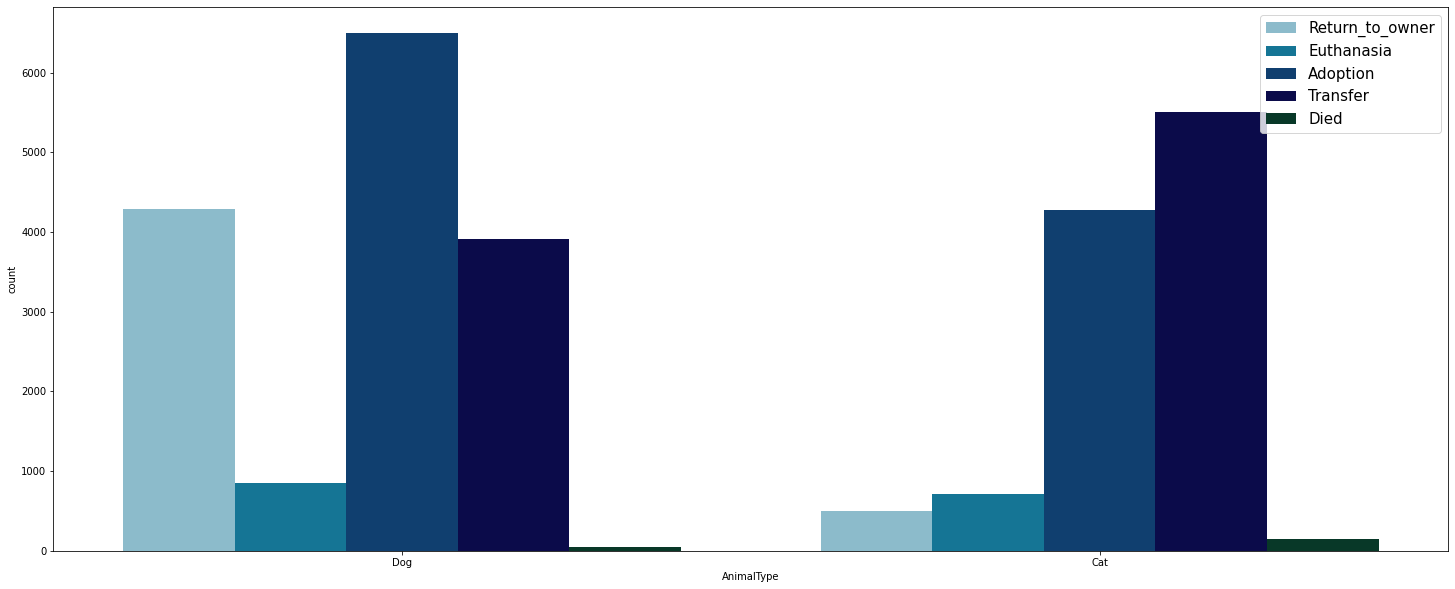

In [11]:
plt.figure(figsize=(25,10))
sns.countplot(data=df,
              x='AnimalType',
              hue='OutcomeType',
              palette='ocean_r')
plt.legend(loc='upper right', prop={'size': 15})
plt.show()

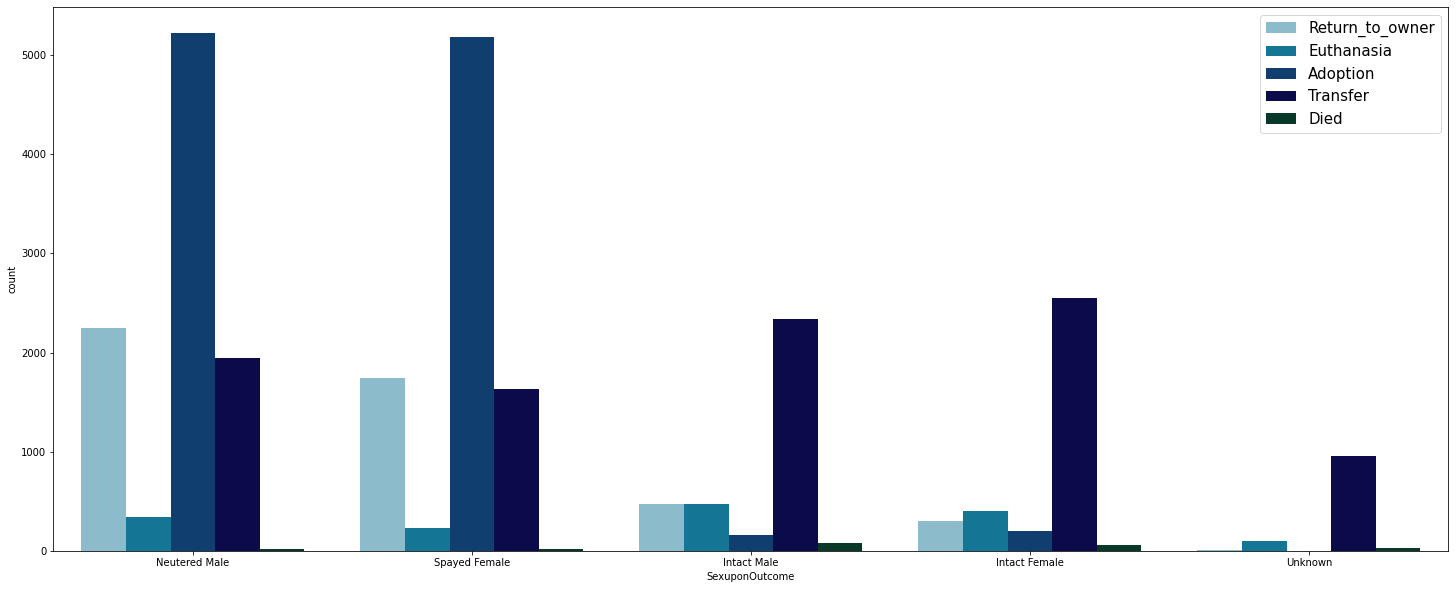

In [12]:
plt.figure(figsize=(25, 10))
sns.countplot(data=df,
              x='SexuponOutcome',
              hue='OutcomeType',
              palette='ocean_r')
plt.legend(loc='upper right', prop={'size': 15})
plt.show()

### Cleaning/Preparing the data

In [13]:
# Check null values in OutcomeType
df.OutcomeType.isnull().sum()

0

In [14]:
# Check amount of different values in SexuponOutcome
df.SexuponOutcome.value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [15]:
# Check null values in SexuponOutcome
df.SexuponOutcome.isnull().sum()

1

In [16]:
# Set the null value to the category Unknown
df['SexuponOutcome'].fillna('Unknown', inplace=True)

In [17]:
# Creat a column with name 'DeathAsOutcomeBinary' containing 1/0 depending on if it appears in death_list
death_list = ['Euthanasia', 'Died']
df['DeathAsOutcomeBinary'] = np.where(df['OutcomeType'].isin(death_list), 1, 0)

In [18]:
df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,DeathAsOutcomeBinary
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0
...,...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,0
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0


In [19]:
# Make column NameBinary containing 1/0 depending on if animal have a name or not
df['NameBinary'] = np.where(df['Name'].isnull(), 0, 1)

In [20]:
df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,DeathAsOutcomeBinary,NameBinary
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0,1
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,1
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,0,1
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,0,1
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0


In [21]:
# Sex in binary, where male is 1, female is 0 and Unknown is 2.
df['SexBinary'] = df['SexuponOutcome'].apply(lambda x: int(1) if 'Male' in str(x) else int(2) if 'Unknown' in str(x) else int(0))

In [22]:
df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,DeathAsOutcomeBinary,NameBinary,SexBinary
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0,1,1
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,1,0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,0,1,1
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,0,1
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0,1
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,0,1,1
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,1


In [23]:
# Binary if animal is intact or neutered/spayed
df['IntactBinary'] = df['SexuponOutcome'].apply(lambda x: int(1) if 'Intact' in str(x) else int(2) if 'Unknown' in str(x) else int(0))

In [24]:
df.AgeuponOutcome.isnull().sum()

18

In [25]:
# With that small amount of null value I dont remove it, but set it to the most common value in that column
df['AgeuponOutcome'].fillna(df['AgeuponOutcome'].value_counts().index[0], inplace=True)

In [26]:
df.AgeuponOutcome.isnull().sum()

0

In [27]:
# Splitting AgeuponOutcome into to columns. 
# AgeNumber column = int of the first part.
# AgeString column = str of 'week', 'month', 'year' will later be convertet to ints
df['AgeNumber'] = df['AgeuponOutcome'].str.split(' ').str[0].astype(int)
df['AgeString'] = df['AgeuponOutcome'].str.split(' ').str[1]

In [28]:
# Convert AgeString to ints
df['AgeString'] = np.where(df['AgeString'].str.contains('day'), 1, 
                         np.where(df['AgeString'].str.contains('week'), 7, 
                         np.where(df['AgeString'].str.contains('month'), 30, 
                         np.where(df['AgeString'].str.contains('year'), 365, 0)))).astype(int)

In [29]:
# Make columns Days and Years with ints
df['AgeOutcomeDays'] = df['AgeNumber'] * df['AgeString']
df['AgeOutcomeYears'] = (df['AgeOutcomeDays'] / 365).round(5)

In [30]:
df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,DeathAsOutcomeBinary,NameBinary,SexBinary,IntactBinary,AgeNumber,AgeString,AgeOutcomeDays,AgeOutcomeYears
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0,1,1,0,1,365,365,1.00000
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,1,0,0,1,365,365,1.00000
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,0,1,1,0,2,365,730,2.00000
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,0,1,1,3,7,21,0.05753
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,0,1,0,2,365,730,2.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,0,0,1,1,1,30,30,0.08219
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,0,0,0,0,3,30,90,0.24658
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,0,1,1,0,4,365,1460,4.00000
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,0,0,1,1,4,7,28,0.07671


In [31]:
# Converting 'datetime' column into readable date and times.
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extracting month, year and day data.
df['OutcomeMonth'] = df['DateTime'].dt.month
df['OutcomeYear'] = df['DateTime'].dt.year
df['OutcomeDay'] = df['DateTime'].dt.dayofweek

In [32]:
df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,...,NameBinary,SexBinary,IntactBinary,AgeNumber,AgeString,AgeOutcomeDays,AgeOutcomeYears,OutcomeMonth,OutcomeYear,OutcomeDay
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,...,1,1,0,1,365,365,1.00000,2,2014,2
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,...,1,0,0,1,365,365,1.00000,10,2013,6
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,...,1,1,0,2,365,730,2.00000,1,2015,5
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,...,0,1,1,3,7,21,0.05753,7,2014,4
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,...,0,1,0,2,365,730,2.00000,11,2013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,...,0,1,1,1,30,30,0.08219,5,2015,3
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,...,0,0,0,3,30,90,0.24658,1,2016,2
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,...,1,1,0,4,365,1460,4.00000,3,2015,0
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,...,0,1,1,4,7,28,0.07671,4,2014,6


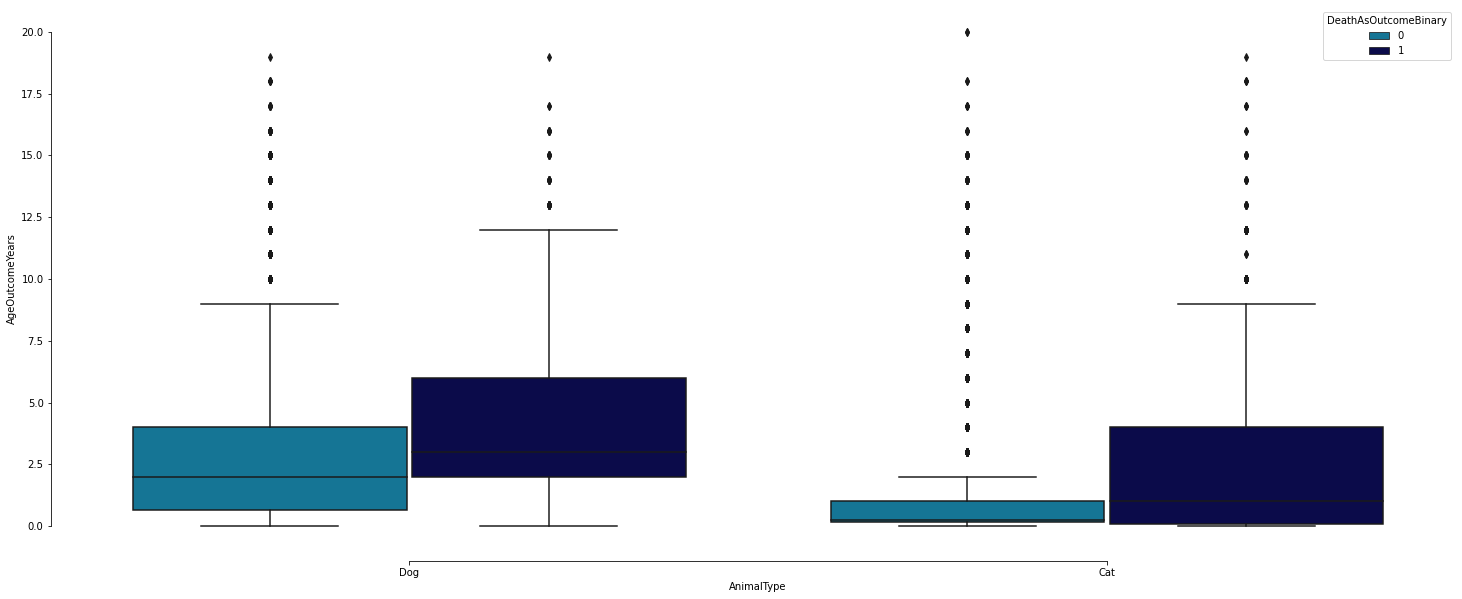

In [33]:
# Boxplot of different animaltypes and DeathAsOutcome True/False

plt.figure(figsize=(25,10))
sns.boxplot(x="AnimalType", y="AgeOutcomeYears",hue="DeathAsOutcomeBinary", data=df, palette="ocean_r")
sns.despine(offset=10, trim=True)

#### As can be seen in the plot above younger animal have higher chance to not either die or euthanasia

In [34]:
df['OutcomeDay'].value_counts()

5    4348
6    4317
1    3896
0    3696
4    3586
2    3510
3    3376
Name: OutcomeDay, dtype: int64

In [35]:
# Column with True or False in binary if the animal is of mixed breed
mixed_breed_list = ['Mix', 'Domestic']
df['MixedBreed'] = np.where(df['Breed'].str.contains('Mix' or 'Domestic'), 1, 0)

In [36]:
df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,...,SexBinary,IntactBinary,AgeNumber,AgeString,AgeOutcomeDays,AgeOutcomeYears,OutcomeMonth,OutcomeYear,OutcomeDay,MixedBreed
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,...,1,0,1,365,365,1.00000,2,2014,2,1
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,...,0,0,1,365,365,1.00000,10,2013,6,1
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,...,1,0,2,365,730,2.00000,1,2015,5,1
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,...,1,1,3,7,21,0.05753,7,2014,4,1
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,...,1,0,2,365,730,2.00000,11,2013,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White,...,1,1,1,30,30,0.08219,5,2015,3,1
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby,...,0,0,3,30,90,0.24658,1,2016,2,1
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan,...,1,0,4,365,1460,4.00000,3,2015,0,1
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black,...,1,1,4,7,28,0.07671,4,2014,6,1


In [37]:
df.MixedBreed.value_counts()

1    22298
0     4431
Name: MixedBreed, dtype: int64

In [38]:
# Building a list of coat patterns both on dog and cats. 
# Inspiration from https://aaronschlegel.me/extraction-feature-engineering-aac-data-requests-pandas.html
coat_patterns = ['bicolor','tricolor','merle','tuxedo','harlequin','spotted','tick','brindle','saddle',
                'sable','tabby', 'tortie', 'tortoiseshell', 'calico', 'smoke', 'torbie',
                 'colorpoint', 'point', 'brindle', 'agouti']
coat_regex = '(' + '|'.join(coat_patterns) + ')'

coat_regex

'(bicolor|tricolor|merle|tuxedo|harlequin|spotted|tick|brindle|saddle|sable|tabby|tortie|tortoiseshell|calico|smoke|torbie|colorpoint|point|brindle|agouti)'

In [39]:
# Use a regex string with pandas str.extract to seperate color and coatpattern in the color column

df['Color'] = df['Color'].str.lower()
df['CoatPattern'] = df['Color'].str.extract(coat_regex, expand=False)
df['ColorWithoutPattern'] = df['Color'].str.replace(coat_regex, '').str.strip()

C:\Users\eward\AppData\Local\Temp\ipykernel_4452\3034057036.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ColorWithoutPattern'] = df['Color'].str.replace(coat_regex, '').str.strip()


In [40]:
df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,...,AgeNumber,AgeString,AgeOutcomeDays,AgeOutcomeYears,OutcomeMonth,OutcomeYear,OutcomeDay,MixedBreed,CoatPattern,ColorWithoutPattern
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,brown/white,...,1,365,365,1.00000,2,2014,2,1,NaN,brown/white
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,cream tabby,...,1,365,365,1.00000,10,2013,6,1,tabby,cream
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,blue/white,...,2,365,730,2.00000,1,2015,5,1,NaN,blue/white
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,blue cream,...,3,7,21,0.05753,7,2014,4,1,NaN,blue cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,tan,...,2,365,730,2.00000,11,2013,4,0,NaN,tan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,brown tabby/white,...,1,30,30,0.08219,5,2015,3,1,tabby,brown /white
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,brown tabby,...,3,30,90,0.24658,1,2016,2,1,tabby,brown
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,white/tan,...,4,365,1460,4.00000,3,2015,0,1,NaN,white/tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,black,...,4,7,28,0.07671,4,2014,6,1,NaN,black


In [41]:
#Splitting color column into two color columns with MainColor and SecondaryColor
df = pd.concat([df, 
                df['ColorWithoutPattern'].str.split('/', expand=True).rename(columns={0:'MainColor', 1:'SecondaryColor'})], 
                axis=1)

#Replacing blanks in MainColor with 'Special Color'.
df['MainColor'] = np.where(df['MainColor'] == '', 'Special Color', df['MainColor'])

In [42]:
df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,...,AgeOutcomeDays,AgeOutcomeYears,OutcomeMonth,OutcomeYear,OutcomeDay,MixedBreed,CoatPattern,ColorWithoutPattern,MainColor,SecondaryColor
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,brown/white,...,365,1.00000,2,2014,2,1,NaN,brown/white,brown,white
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,cream tabby,...,365,1.00000,10,2013,6,1,tabby,cream,cream,None
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,blue/white,...,730,2.00000,1,2015,5,1,NaN,blue/white,blue,white
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,blue cream,...,21,0.05753,7,2014,4,1,NaN,blue cream,blue cream,None
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,tan,...,730,2.00000,11,2013,4,0,NaN,tan,tan,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,brown tabby/white,...,30,0.08219,5,2015,3,1,tabby,brown /white,brown,white
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,brown tabby,...,90,0.24658,1,2016,2,1,tabby,brown,brown,None
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,white/tan,...,1460,4.00000,3,2015,0,1,NaN,white/tan,white,tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,black,...,28,0.07671,4,2014,6,1,NaN,black,black,None


### Drop unnecessary columns

In [43]:
df.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color',
       'DeathAsOutcomeBinary', 'NameBinary', 'SexBinary', 'IntactBinary',
       'AgeNumber', 'AgeString', 'AgeOutcomeDays', 'AgeOutcomeYears',
       'OutcomeMonth', 'OutcomeYear', 'OutcomeDay', 'MixedBreed',
       'CoatPattern', 'ColorWithoutPattern', 'MainColor', 'SecondaryColor'],
      dtype='object')

In [44]:
train_df = df.drop(['AnimalID', 'Name', 'DateTime', 'OutcomeSubtype', 'AgeuponOutcome', 'Breed', 'Color', 'AgeNumber', 
                            'AgeString', 'CoatPattern', 'ColorWithoutPattern', 'SecondaryColor', 'SexuponOutcome'], axis=1)

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OutcomeType           26729 non-null  object 
 1   AnimalType            26729 non-null  object 
 2   DeathAsOutcomeBinary  26729 non-null  int32  
 3   NameBinary            26729 non-null  int32  
 4   SexBinary             26729 non-null  int64  
 5   IntactBinary          26729 non-null  int64  
 6   AgeOutcomeDays        26729 non-null  int32  
 7   AgeOutcomeYears       26729 non-null  float64
 8   OutcomeMonth          26729 non-null  int64  
 9   OutcomeYear           26729 non-null  int64  
 10  OutcomeDay            26729 non-null  int64  
 11  MixedBreed            26729 non-null  int32  
 12  MainColor             26729 non-null  object 
dtypes: float64(1), int32(4), int64(5), object(3)
memory usage: 2.2+ MB


<AxesSubplot:>

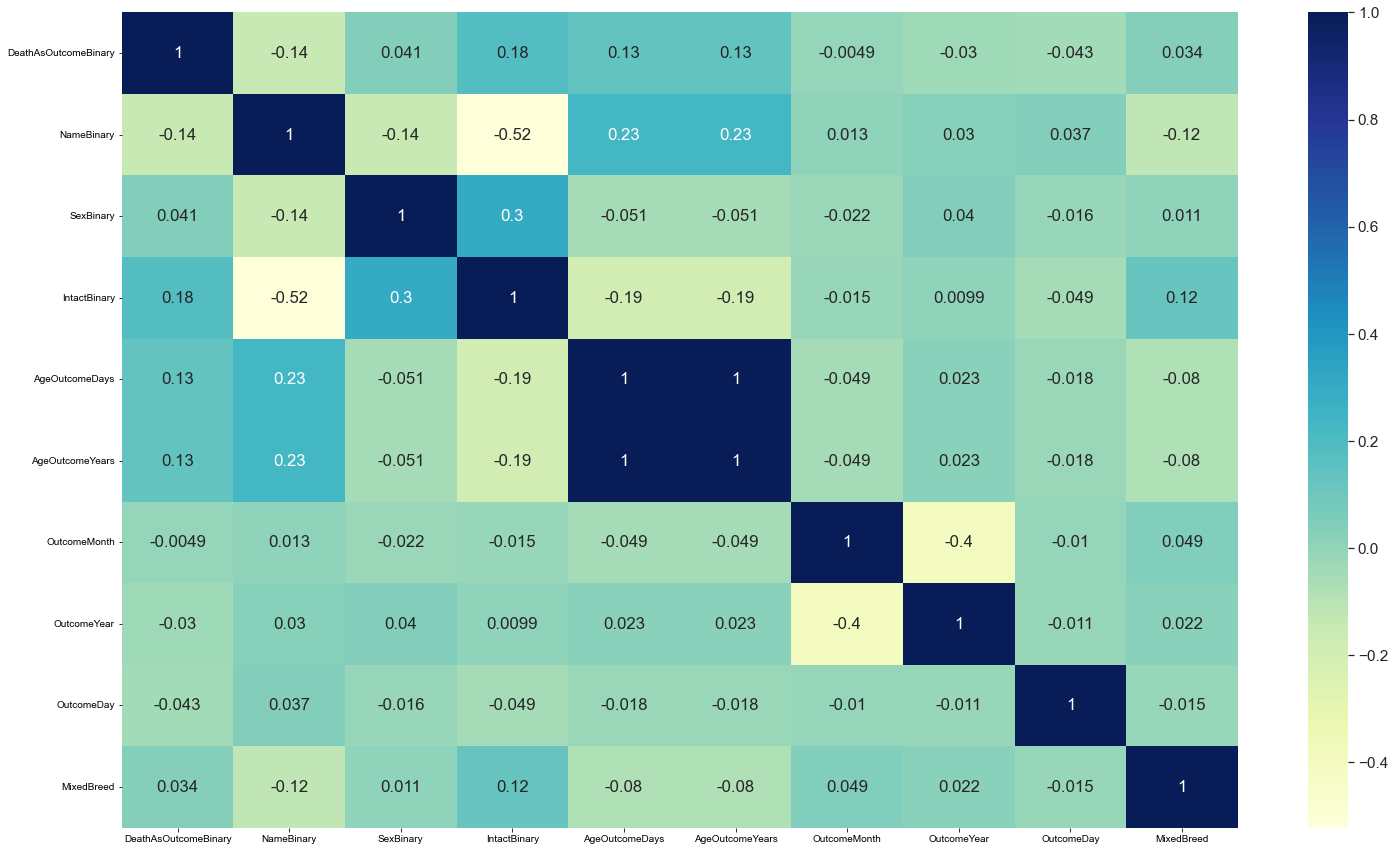

In [46]:
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.4)

sns.heatmap(train_df.corr(), annot=True, cmap='YlGnBu')

### Encode the string remaining in the dataset

In [47]:
columns = ['AnimalType','MainColor']

def encoder(df):
    for col in columns:
        label_encoder = LabelEncoder()
        label_encoder.fit(df[col])
        df[col] = label_encoder.transform(df[col])
    return df

### Testing Model with Random Forest

In [48]:
train_df_rf = encoder(train_df)
rfc = ensemble.RandomForestClassifier()
X_rf = train_df_rf.drop(['OutcomeType','DeathAsOutcomeBinary'], 1)
y_rf = train_df_rf['OutcomeType']

#X = pd.get_dummies(X)

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3,
                                                    random_state=0, stratify=y_rf)

C:\Users\eward\AppData\Local\Temp\ipykernel_4452\1365052224.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_rf = train_df_rf.drop(['OutcomeType','DeathAsOutcomeBinary'], 1)


In [49]:
rfc.fit(X_train_rf, y_train_rf)

RandomForestClassifier()

In [50]:
rfc.score(X_test_rf, y_test_rf)

0.6189051003865819

In [51]:
cross_val_score(rfc, X_rf, y_rf, cv=5)

array([0.61429106, 0.62794613, 0.6221474 , 0.62495324, 0.61683817])

In [52]:
y_pred_rf = rfc.fit(X_train_rf, y_train_rf).predict(X_train_rf)

<AxesSubplot:xlabel='feature', ylabel='importance'>

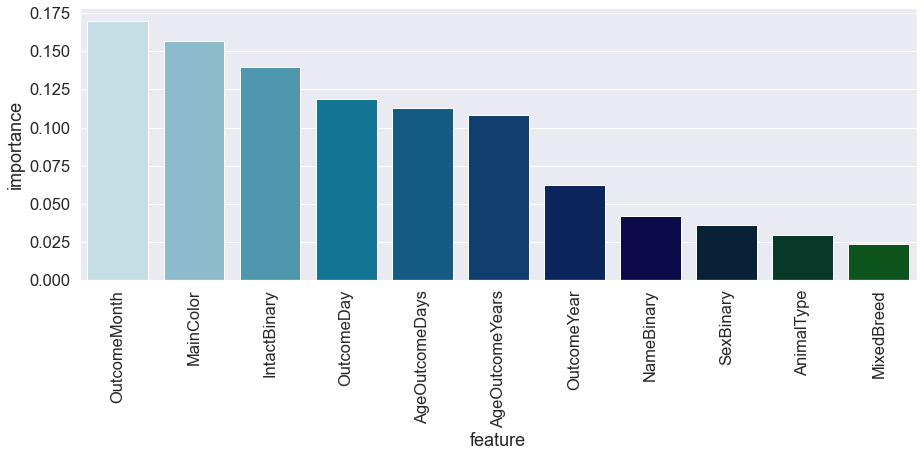

In [53]:
feature_importances = rfc.feature_importances_

importances = pd.DataFrame({'importance': feature_importances, 'feature': X_rf.columns}, 
                           index=X_rf.columns).sort_values(by='importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=importances[0:15], palette='ocean_r')

#### With Random Forest we get a score of 0.61

### Testing Model with Random Forest and OverSampling the Imbalance

In [54]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_os, y_os = ros.fit_resample(X_rf, y_rf)

In [55]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size=0.3,
                                                    random_state=0, stratify=y_os)

In [56]:
from collections import Counter
print(sorted(Counter(y_os).items()))

[('Adoption', 10769), ('Died', 10769), ('Euthanasia', 10769), ('Return_to_owner', 10769), ('Transfer', 10769)]


In [57]:
rfc.fit(X_train_os, y_train_os)

RandomForestClassifier()

In [58]:
rfc.score(X_test_os, y_test_os)

0.8418348396681936

In [59]:
cross_val_score(rfc, X_os, y_os, cv=5)

array([0.83313214, 0.83963228, 0.85653264, 0.86238277, 0.89237627])

In [60]:
y_pred_os = rfc.fit(X_train_os, y_train_os).predict(X_train_os)

<AxesSubplot:xlabel='feature', ylabel='importance'>

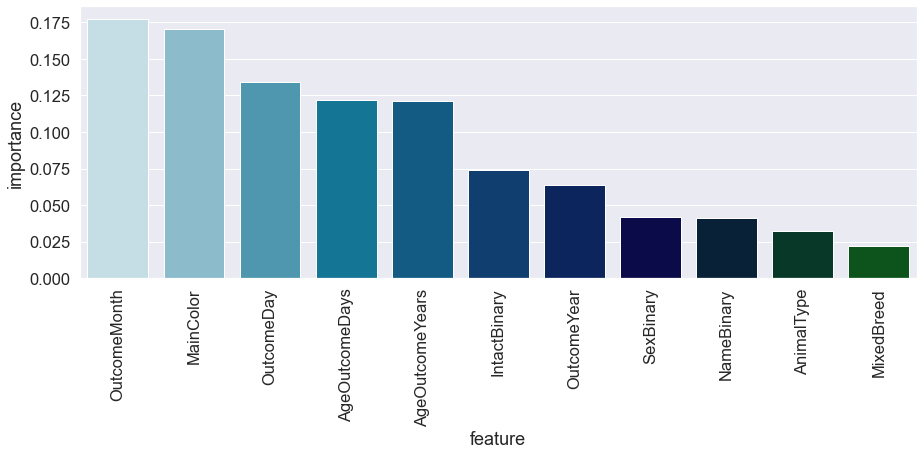

In [61]:
feature_importances = rfc.feature_importances_

importances = pd.DataFrame({'importance': feature_importances, 'feature': X_os.columns}, 
                           index=X_os.columns).sort_values(by='importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=importances[0:15], palette='ocean_r')

### When doing Random Over Sampling we get a much better score of --> 0.84

### Testing Model with DecisionTree

In [62]:
# initialization
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
)

In [63]:
train_df_dt = encoder(train_df)

In [64]:
binary_columns = ['DeathAsOutcomeBinary', 'NameBinary', 'SexBinary', 'IntactBinary', 'MixedBreed']
train_df_dt[binary_columns] = train_df_dt[binary_columns].astype(bool)

In [65]:
category_columns = ['OutcomeMonth','OutcomeYear', 'OutcomeDay']
train_df_dt[category_columns] = train_df_dt[category_columns].astype(str)

In [66]:
X_dt = train_df_dt.drop(['OutcomeType','DeathAsOutcomeBinary'], 1)
y_dt = train_df_dt['DeathAsOutcomeBinary']

decision_tree.fit(X_dt, y_dt)

C:\Users\eward\AppData\Local\Temp\ipykernel_4452\2733836691.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_dt = train_df_dt.drop(['OutcomeType','DeathAsOutcomeBinary'], 1)


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=1)

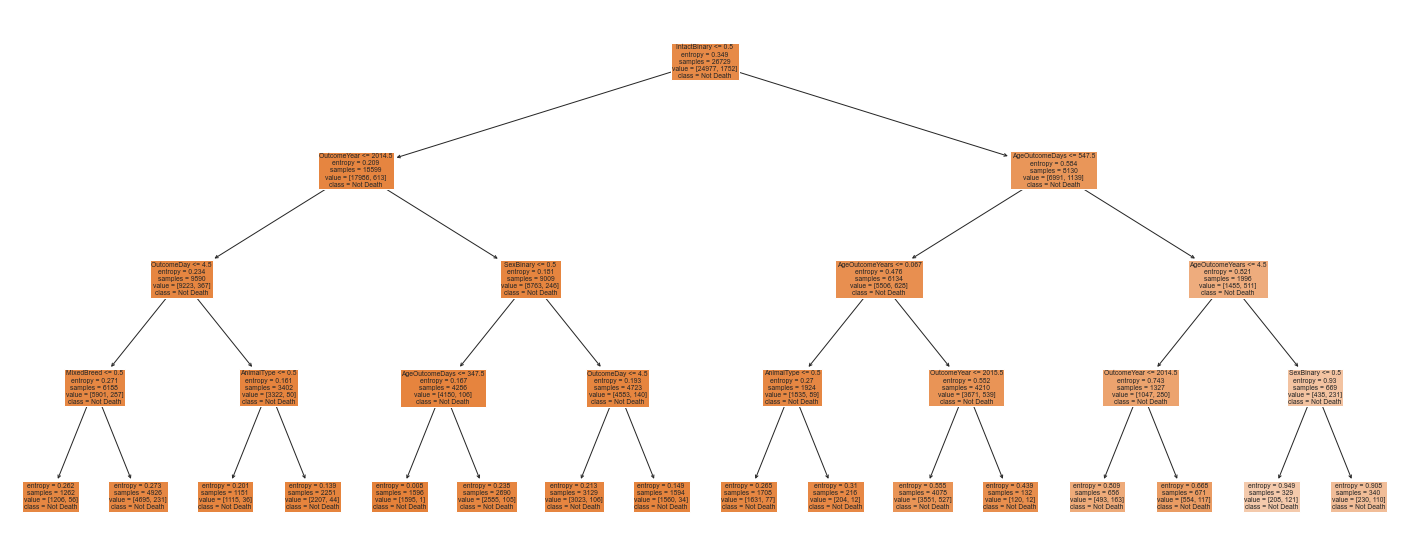

In [67]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(decision_tree, 
                   feature_names=X_dt.columns,  
                   class_names=['Not Death', 'Death'],
                   filled=True)

In [68]:
decision_tree.score(X_dt, y_dt)

0.9344532156085151

In [69]:
cross_val_score(decision_tree, X_dt, y_dt, cv=5)

array([0.93453049, 0.93509166, 0.93434343, 0.93434343, 0.93376988])

<AxesSubplot:xlabel='feature', ylabel='importance'>

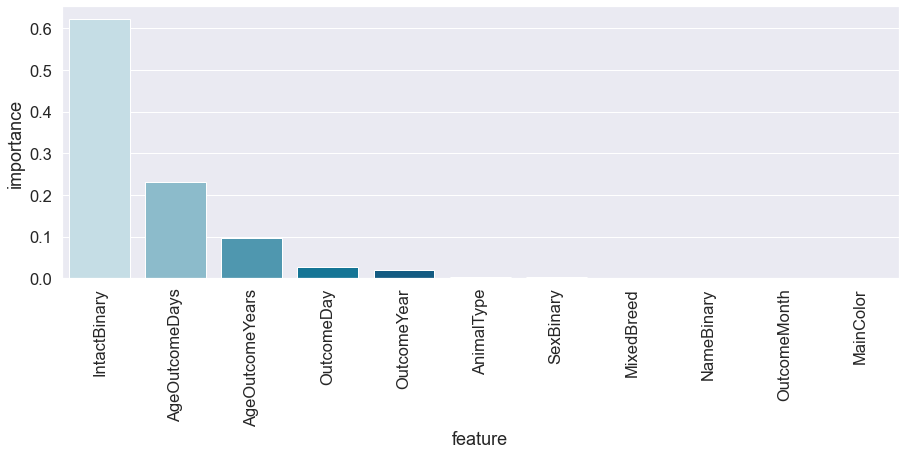

In [70]:
feature_importances = decision_tree.feature_importances_

importances = pd.DataFrame({'importance': feature_importances, 'feature': X_dt.columns}, 
                           index=X_dt.columns).sort_values(by='importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=importances[0:15], palette='ocean_r')

#### Great score of 0.93. DeathAsOutcomeBinary is used to predict the outcome. Might be high imbalance of the data that makes the great result and it might not be reliable. Might want to true balance out the data if DeathAsOutcomeBinary is used for the prediction.

### Decision Tree with oversampling

In [71]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_dt_os, y_dt_os = ros.fit_resample(X_dt, y_dt)

In [72]:
from collections import Counter
print(sorted(Counter(y_dt_os).items()))

[(False, 24977), (True, 24977)]


In [73]:
decision_tree.fit(X_dt_os, y_dt_os)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=1)

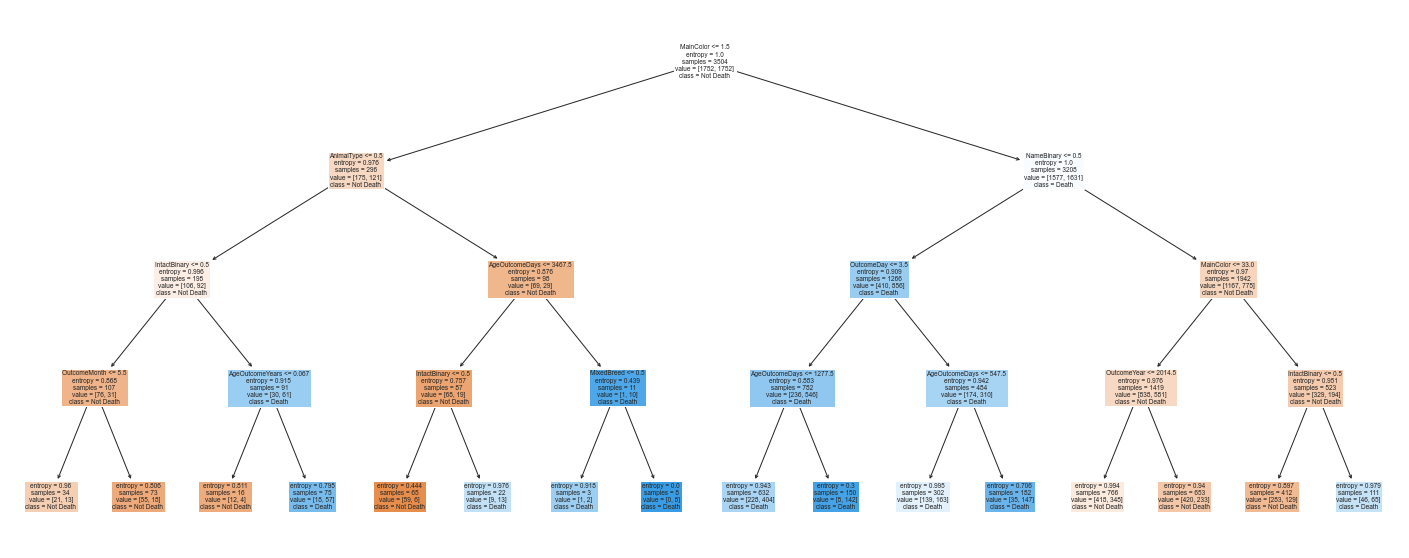

In [83]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(decision_tree, 
                   feature_names=X_dt_os.columns,  
                   class_names=['Not Death', 'Death'],
                   filled=True)

In [74]:
decision_tree.score(X_dt_os, y_dt_os)

0.6136845898226369

In [75]:
cross_val_score(decision_tree, X_dt_os, y_dt_os, cv=5)

array([0.70973876, 0.58903013, 0.61685517, 0.60674607, 0.57047047])

<AxesSubplot:xlabel='feature', ylabel='importance'>

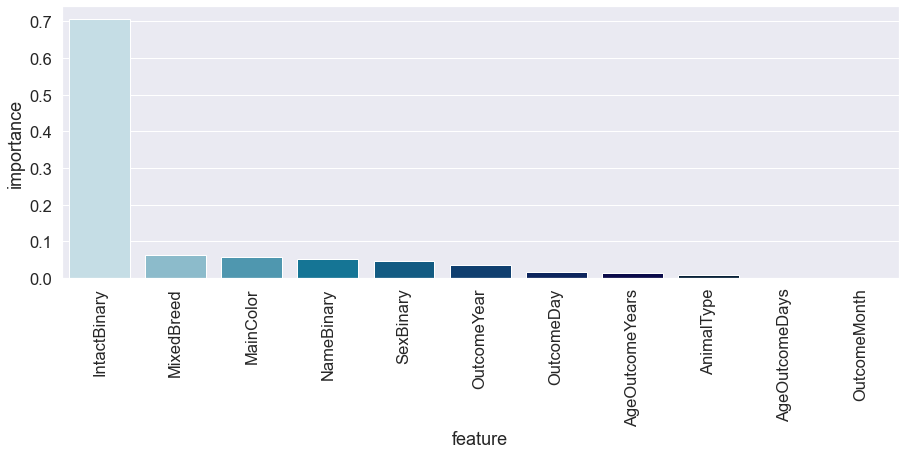

In [76]:
feature_importances = decision_tree.feature_importances_

importances = pd.DataFrame({'importance': feature_importances, 'feature': X_dt_os.columns}, 
                           index=X_dt_os.columns).sort_values(by='importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=importances[0:15], palette='ocean_r')

### Decision Tree with oversampling gives a score of 0.64. It is worse than without oversampling but might be more reliable.

### Decision Tree with undersampling

In [77]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_dt_us, y_dt_us = rus.fit_resample(X_dt, y_dt)

In [78]:
from collections import Counter
print(sorted(Counter(y_dt_us).items()))

[(False, 1752), (True, 1752)]


In [79]:
decision_tree.fit(X_dt_us, y_dt_us)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=1)

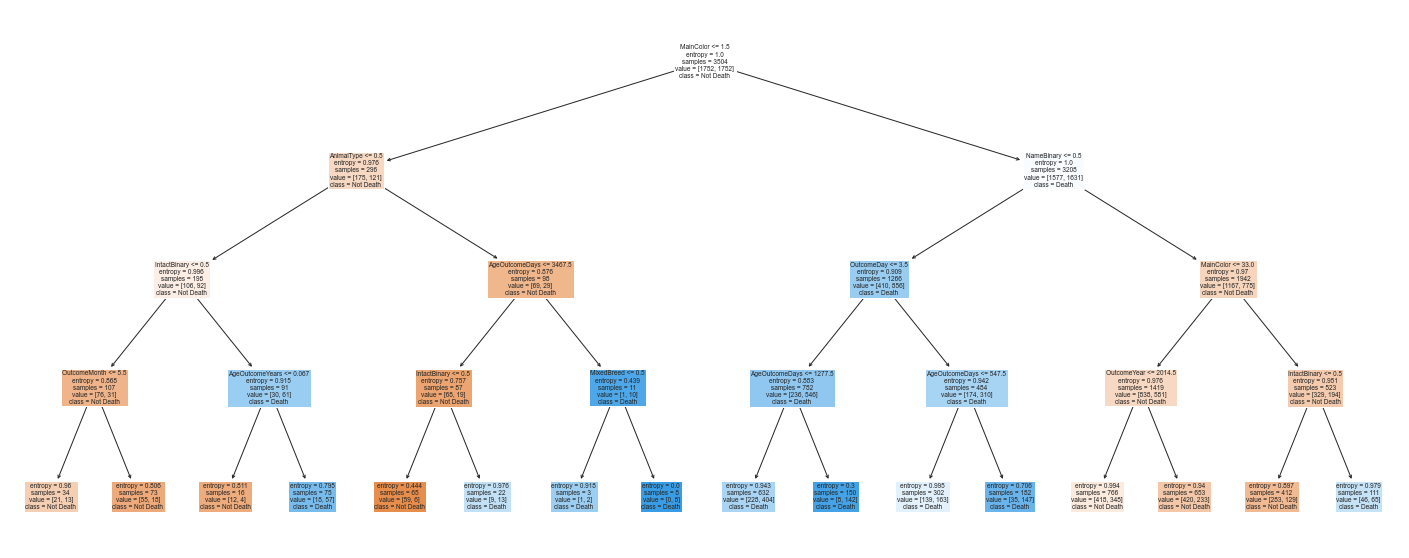

In [84]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(decision_tree, 
                   feature_names=X_dt_us.columns,  
                   class_names=['Not Death', 'Death'],
                   filled=True)

In [80]:
decision_tree.score(X_dt_us, y_dt_us)

0.6475456621004566

In [81]:
cross_val_score(decision_tree, X_dt_us, y_dt_us, cv=5)

array([0.60912981, 0.63766049, 0.60485021, 0.66476462, 0.66714286])

<AxesSubplot:xlabel='feature', ylabel='importance'>

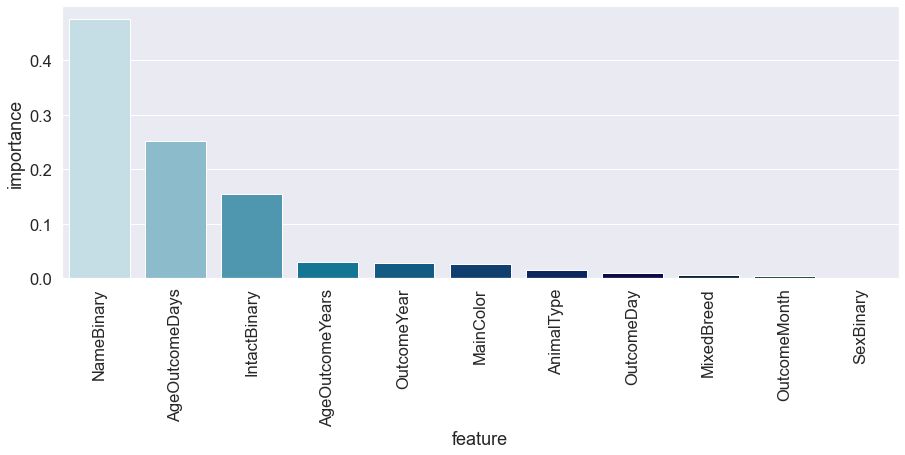

In [82]:
feature_importances = decision_tree.feature_importances_

importances = pd.DataFrame({'importance': feature_importances, 'feature': X_dt_us.columns}, 
                           index=X_dt_us.columns).sort_values(by='importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=importances[0:15], palette='ocean_r')

### Decision Tree with undersampling gives a score of 0.71, better than with oversampling